## -----------------------------------------------------------------------------------------------
#  Property Prediction Project for IBM Capstone
## -----------------------------------------------------------------------------------------------

## -----------------------------------------------------------------------------------------------

**Name** : Prithvi Sharma 

**Course** : IBM Capstone 

**Date** : 23-Dec-2019 

**Title**: Property Prediction using Data Science Model

## -----------------------------------------------------------------------------------------------
**
This is a model made for prediction of Property with help of UCI Machine Learning Repository Datasets. This model predicts price of any property from its specific attributes.**

## -----------------------------------------------------------------------------------------------

# *Attribute Information:*

**CRIM**    -  Per capita crime rate by town

**ZN**      -  Proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS**  -  Proportion of non-retail business acres per town

**CHAS**    -  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

**NOX**    -  Nitric oxides concentration (parts per 10 million)

**RM**      -  Average number of rooms per dwelling

**AGE**     -  Proportion of owner-occupied units built prior to 1940

**DIS**    -  Weighted distances to five Boston employment centres

**RAD**     -  Index of accessibility to radial highways

**TAX**     -  Full-value property-tax rate per $10,000

**PTRATIO** -  Pupil-teacher ratio by town

**B**       -  1000(Bk - 0.63)^2 where Bk is the proportion of immigrants

**LSTAT**   -  Percentage lower status of the population

**MEDV**    -  Median value of owner-occupied homes in $1000's

## -----------------------------------------------------------------------------------------------
# Getting the data and filtering it
## -----------------------------------------------------------------------------------------------

In [1]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e057c2b72f0b498fb78854885432d37d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='2zHIAE633xpYSxN24gKRbzAgo4zDpp4b7LHmCsCtqtc6',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e057c2b72f0b498fb78854885432d37d.get_object(Bucket='default-donotdelete-pr-60wnbqfjxxmk9s',Key='data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
#Filtering columns with no value

df = df.dropna(axis='columns', how='all')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#Looking at values of different variables

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feabc4d0588>,
      dtype=object)

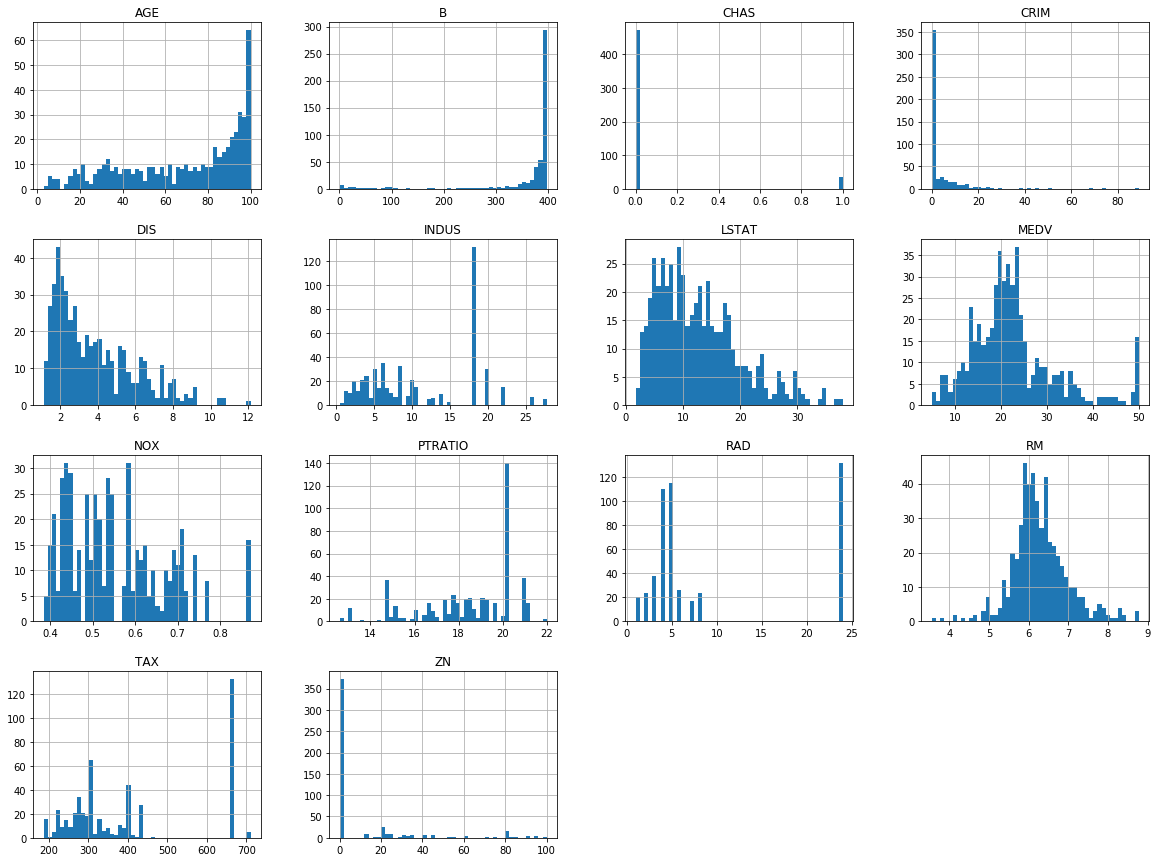

In [4]:
# Plotting histogram  

%matplotlib inline

import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20, 15))

## -----------------------------------------------------------------------------------------------
# Splitting main data into Test & Train Datasets
## -----------------------------------------------------------------------------------------------

In [5]:
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:] 
    return data.iloc[train_indices], data.iloc[test_indices]

In [6]:
# Taking out 20% of data into Test Set

from sklearn.model_selection import train_test_split
train_set, test_set  = train_test_split(df, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

Rows in train set: 404
Rows in test set: 102



## -----------------------------------------------------------------------------------------------
# Observing splitted Data
## -----------------------------------------------------------------------------------------------

In [7]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['CHAS']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [8]:
# Full Data
df['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [9]:
# Test Data
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [10]:
# Train Data
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [11]:
# Observing consistensy of data
471/35

13.457142857142857

In [12]:
test_ratio = 95/7

In [13]:
train_ratio = 376/28

In [14]:
Diff = (float(test_ratio) - float(train_ratio))*100/float(train_ratio)
print("Difference = ",Diff,"%")

Difference =  1.0638297872340388 %


## -----------------------------------------------------------------------------------------------
# Correlation
## -----------------------------------------------------------------------------------------------

In [15]:
# Correlation
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feab4f4e6d8>,
      dtype=object)

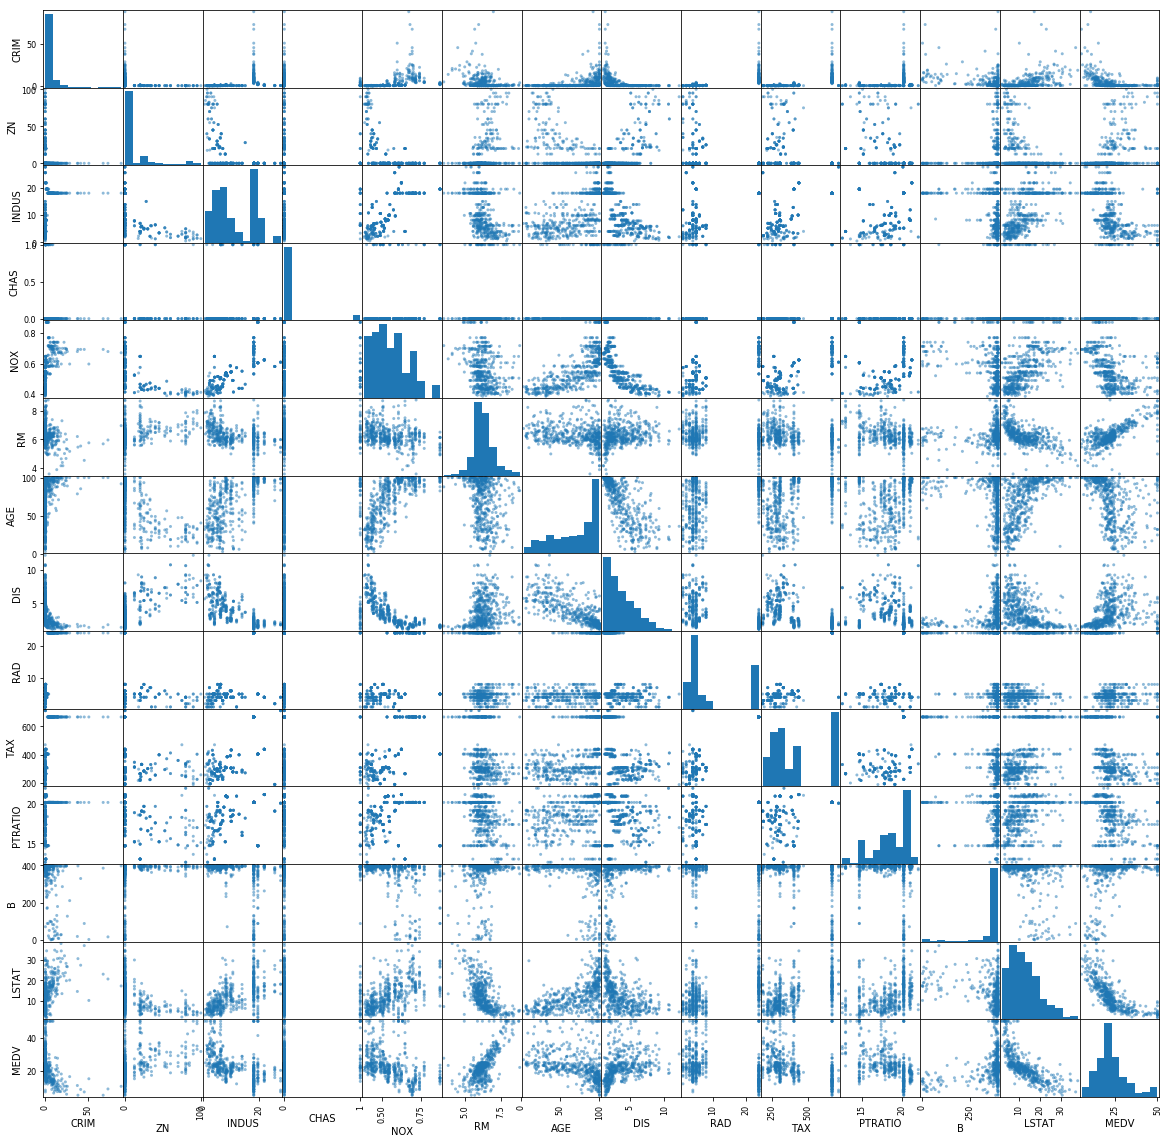

In [16]:
# Plotting Correlation in scatter matrix

from pandas.plotting import scatter_matrix

attributes = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT',"MEDV"]
scatter_matrix(df[attributes], figsize = (20,20))

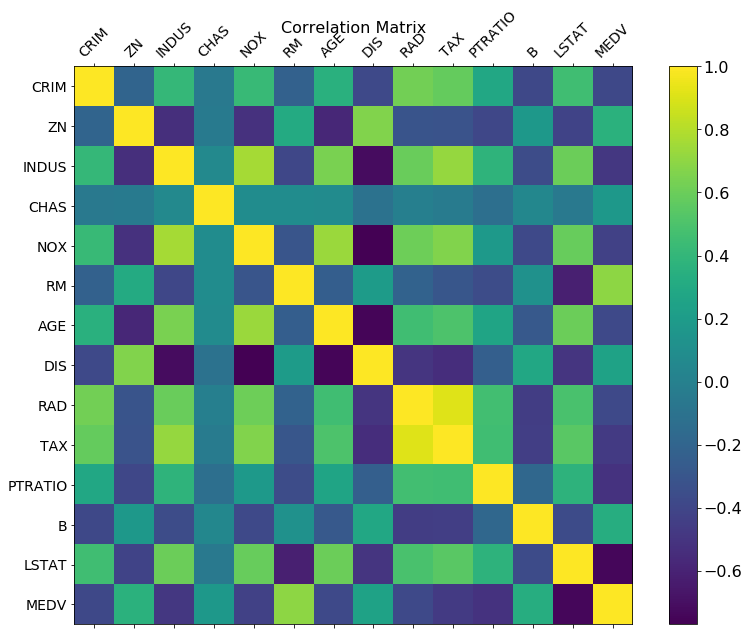

In [17]:
#Plotting normal Correlation matrix

f = plt.figure(figsize=(13, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
plt.title('Correlation Matrix', fontsize=16);

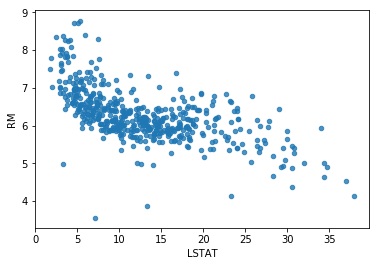

In [18]:
df.plot(kind="scatter", x="LSTAT", y="RM", alpha=0.8)

## -----------------------------------------------------------------------------------------------
# Inter-realated Combination Experimenting.
## -----------------------------------------------------------------------------------------------

In [19]:
df["LSTATRM"] = df['LSTAT']/df['RM']
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,LSTATRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0.757414
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1.423454
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0.560891
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0.420120
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0.745767


In [20]:
corr_matrix = df.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.696169
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTATRM   -0.707539
LSTAT     -0.737663
Name: MEDV, dtype: float64

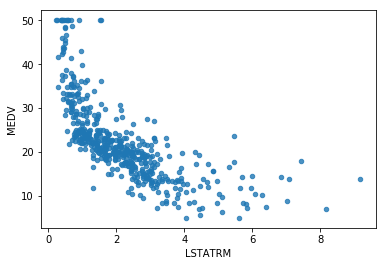

In [21]:
df.plot(kind="scatter", x="LSTATRM", y="MEDV", alpha=0.8)

In [22]:
df = strat_train_set.drop("MEDV", axis=1)
df_labels = strat_train_set["MEDV"].copy()

## -----------------------------------------------------------------------------------------------
# Covering missing attributes in it
## -----------------------------------------------------------------------------------------------

In [23]:
# Setting values to 'Median'

median = df["RAD"].median()
df["RAD"].fillna(median)

254     1
348     4
476    24
321     5
326     5
411    24
250     7
100     5
429    24
57      5
413    24
115     6
490     4
199     3
494     6
142     5
113     6
468    24
400    24
247     7
151     5
408    24
68      4
365    24
81      4
93      4
456    24
116     6
27      4
234     8
       ..
433    24
430    24
479    24
438    24
38      5
18      4
97      2
266     5
133     4
449    24
477    24
171     5
180     3
158     5
279     5
109     5
82      4
386    24
418    24
126     2
446    24
101     5
277     4
405    24
367    24
155     5
423    24
98      2
455    24
216     5
Name: RAD, Length: 404, dtype: int64

In [24]:
df.shape

(404, 13)

In [25]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,399.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.279481,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.716784,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.876500,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630500,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(df)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='median', verbose=0)

In [27]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.20900e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [28]:
X = imputer.transform(df)

In [29]:
df_tr = pd.DataFrame(X, columns=df.columns)

In [30]:
df_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.278609,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712366,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.209000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## -----------------------------------------------------------------------------------------------
# Pipelining
## -----------------------------------------------------------------------------------------------

In [31]:
#Standardization of value
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

In [32]:
df_num_tr = my_pipeline.fit_transform(df)
df_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [33]:
df_num_tr.shape

(404, 13)

## -----------------------------------------------------------------------------------------------
# Evaluating Models
## -----------------------------------------------------------------------------------------------

> **Linear Regression**

In [34]:
from sklearn.linear_model import LinearRegression
LR_model = LinearRegression()

> **Random Forest Regression**

In [35]:
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor()

> **Decision Tree Regression**

In [36]:
from sklearn.tree import DecisionTreeRegressor
DTR_model = DecisionTreeRegressor()

In [37]:
#model = LR_model #For Linear Regression (Worst Model)
#model = RFR_model #For Random Forest Regression (Best model)
model = DTR_model #For Decision Tree Regression (Second Best Model)
model.fit(df_num_tr, df_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [38]:
some_data = df.iloc[:5]
some_labels = df_labels.iloc[:5]
prepared_data = my_pipeline.transform(some_data)

In [39]:
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [40]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## -----------------------------------------------------------------------------------------------
# Testing the prediction
## -----------------------------------------------------------------------------------------------

In [41]:
from sklearn.metrics import mean_squared_error
df_predictions = model.predict(df_num_tr)
mse = mean_squared_error(df_labels, df_predictions)
rms = np.sqrt(mse)
print("RMSE = ",rms)

RMSE =  0.0


Cross Validation

In [42]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_num_tr, df_labels, scoring="neg_mean_squared_error", cv=10)
rms_scores = np.sqrt(-scores)
rms_scores

array([4.09663753, 5.71267312, 5.02202466, 3.79698211, 4.10399196,
       3.06247449, 6.62572638, 4.12677235, 3.54933092, 4.09383683])

In [43]:
# Printing all the tested values
print("Scores:", rms_scores)
print("Mean: ", rms_scores.mean())
print("Standard deviation: ", rms_scores.std())

Scores: [4.09663753 5.71267312 5.02202466 3.79698211 4.10399196 3.06247449
 6.62572638 4.12677235 3.54933092 4.09383683]
Mean:  4.419045034427837
Standard deviation:  1.014127106716276


## -----------------------------------------------------------------------------------------------
# Saving the model
## -----------------------------------------------------------------------------------------------

In [44]:
!pip install joblib

In [45]:
#If you want to download and try it at your pc.
from IPython.display import FileLink, FileLinks
from joblib import dump, load

dump(model, 'Property_prediction_model_final.joblib') 

FileLink('Property_prediction_model_final.joblib')

/home/dsxuser/work/Property_prediction_model_final.joblib

## -----------------------------------------------------------------------------------------------
# Predicting price
## -----------------------------------------------------------------------------------------------

In [46]:
# Entering value

print("Enter the value of following attributes to presict the price:-\n")

#Taking all the values
CRIM = float(input("CRIM = "))
ZN = float(input("ZN = "))
INDUS = float(input("INDUS = "))
CHAS = float(input("CHAS = "))
NOX = float(input("NOX = "))
RM = float(input("RM = "))
AGE = float(input("AGE = "))
DIS = float(input("DIS = "))
RAD = float(input("RAD = "))
TAX = float(input("TAX = "))
PTRATIO = float(input("PTRATIO = "))
B = float(input("B = "))
LSTAT = float(input("LSTAT = "))

# Substituing attributes
attributes = np.array([[CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT]])

# predicting the pricefrom model
prediction = model.predict(attributes)

# Displaying the price in USD($)
print("\nPredicted price = ${0}".format(int(float(prediction)*1000)))

#Actual price is $26,600 of the test

Enter the value of following attributes to presict the price:-

CRIM = 0.02899
ZN = 40
INDUS = 1.25
CHAS = 0
NOX = 0.429
RM = 6.939
AGE = 34.5
DIS = 8.7921
RAD = 1
TAX = 335
PTRATIO = 19.7
B = 389.85
LSTAT = 5.89

Predicted price = $27500


## -----------------------------------------------------------------------------------------------

**Pricted price** = $27,500

**Actual price** = $26,600

**Accuracy** = 96.61654%

## -----------------------------------------------------------------------------------------------

# FIN !